<a href="https://colab.research.google.com/github/workhardzy/K6312/blob/main/topic_classification_ipynb%EF%BC%88for_topic_classification%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb

Exploring the data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [ ]:
path = '/content/gdrive/MyDrive/group/topic_classification.xlsx' #this is from our topic models
df = pd.read_excel(path)
df

,month,topic number,topic name,title,date,topic_area,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,January,1,china coronavirus/virus,China coronavirus outbreak: First case reporte...,2020-01-15,general,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1,January,1,china coronavirus/virus,Japan confirms first case of new China coronav...,2020-01-16,general,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
2,January,1,china coronavirus/virus,China virus: US begins screening travellers af...,2020-01-17,general,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
3,January,1,china coronavirus/virus,Southeast Asia stocks: Singapore falls on Chin...,2020-01-20,business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
4,January,1,china coronavirus/virus,China coronavirus symptoms: Pneumonia-like sym...,2020-01-20,general,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,April,24,oil price,Oil price crisis: US crude PLUMMETS to lowest ...,2020-04-20,general,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
2396,April,24,oil price,Global oil prices bounce back after hitting 21...,2020-04-21,general,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
2397,April,24,oil price,Global oil prices hit 21-year low but stock ma...,2020-04-21,general,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
2398,April,24,oil price,Oil prices are still falling. Asian stocks are...,2020-04-21,general,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN


In [ ]:
tdf = df[['topic number','title']]
tdf

,topic number,title
0,1,China coronavirus outbreak: First case reporte...
1,1,Japan confirms first case of new China coronav...
2,1,China virus: US begins screening travellers af...
3,1,Southeast Asia stocks: Singapore falls on Chin...
4,1,China coronavirus symptoms: Pneumonia-like sym...
...,...,...
2395,24,Oil price crisis: US crude PLUMMETS to lowest ...
2396,24,Global oil prices bounce back after hitting 21...
2397,24,Global oil prices hit 21-year low but stock ma...
2398,24,Oil prices are still falling. Asian stocks are...


In [ ]:
tdf.columns = ['label','title']

<Figure size 576x432 with 0 Axes>

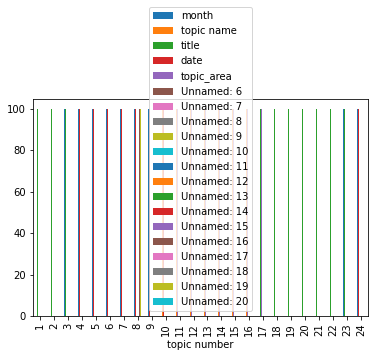

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('topic number').count().plot.bar(ylim=0) #change this
plt.show()

text preprocessing

In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import re
import pickle


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#to remove html tags, lemmatisation . etc etc
additional_stop_words = []                                                      

def text_cleanup(text):  
    '''
    Text pre-processing
        return a sentence of cleaned words
    '''
    text = str(text)
    #remove html tags
    text_clean = BeautifulSoup(text, "lxml").text

    ## Convert to lowercase
    text_clean = text_clean.lower()
    ##Remove non-alphabet
    text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean)

    ##spliting into tokens
    text_clean = text_clean.split()

    ##Remove short words (length < 3)
    text_clean = [w for w in text_clean if len(w)>2]

    ##Lemmatize text ## alternative is to use stemming
    #lemmatizer = WordNetLemmatizer()
    #text_clean = [lemmatizer.lemmatize(w) for w in text_clean]
    
    #ps = PorterStemmer()
    #text_clean = [ps.stem(w) for w in text_clean]
    
    ## Filter out stop words in English 
    stops = set(stopwords.words('english')).union(additional_stop_words)
    text_clean = [w for w in text_clean if w not in stops]
    
    #joining the list into a sentence
    mySeparator = " "
    text_clean = mySeparator.join(text_clean)


    return text_clean

txt = r"This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second problem with the movie is it was just bad. Bad acting, bad special effects, bad plot and poor character development. I have seen better episodes of Miami vice."
print('ORIGINAL','\n', txt)
text_cleanup(txt)

ORIGINAL 
 This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second prob

'movie based bible completely leaves christ movie show rapture second coming christ let alone talk quote scriptures end times called great tribulation movie even show bad times seven bowls seven viles seven trumpets judgements boiled second news cast sea changing structure anti christ killed years tribulation movie ended part got correct two prophets use names course would close truth scriptures worst part really wanted good movie wanted take unsaved people feel movie evil counterfeit like everything devil hope take away upcoming movie based left behind books second problem movie bad bad acting bad special effects bad plot poor character development seen better episodes miami vice'

In [ ]:
X = tdf['title'].fillna('').tolist()
X = [str(i) for i in X]
y = tdf['label'].fillna('').tolist()

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE)


In [ ]:
from tqdm.notebook import tqdm
#for text preprocessing #you can run without doing so

#doing list comprehension
X_train = [text_cleanup(txt) for txt in tqdm(X_train)]
X_test = [text_cleanup(txt) for txt in tqdm(X_test)]

In [ ]:
#vectorising
#do use tfidf if you think it helps
#if need be, can try to use word embeddings

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)


In [ ]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Truth')
  plt.xlabel('Predicted');

Model training

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# fitting naive bayes to the training set 
 
model = MultinomialNB()
%time model.fit(X_train, y_train) 
  
# predicting test set results 
y_pred = model.predict(X_test) 
  
print(classification_report(y_test, y_pred))

CPU times: user 7.13 ms, sys: 2.98 ms, total: 10.1 ms
Wall time: 11.1 ms
              precision    recall  f1-score   support

           1       0.53      0.70      0.60        46
           2       0.75      0.94      0.83        48
           3       0.91      0.84      0.87        57
           4       0.83      0.77      0.80        52
           5       0.87      1.00      0.93        59
           6       0.97      0.67      0.80        55
           7       0.83      0.68      0.75        44
           8       0.95      0.76      0.84        46
           9       0.80      0.80      0.80        44
          10       0.89      0.77      0.82        52
          11       0.95      0.85      0.90        47
          12       0.76      0.92      0.83        52
          13       0.94      0.96      0.95        52
          14       0.98      0.90      0.94        52
          15       0.92      0.90      0.91        49
          16       0.93      0.90      0.91        48
        

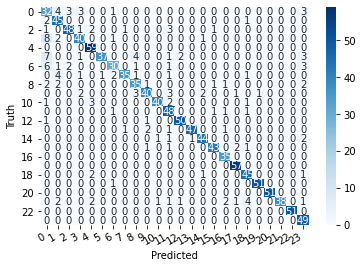

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
filename = '/content/gdrive/My Drive/group/data/NB_topic_class_model.h5'
pickle.dump(model, open(filename, 'wb'))

dataset *labelling* with classifier

In [ ]:
def label_text(text,model,vect):
    text = vect.transform([text])
    return model.predict(text).flatten()[0]

def label_prob(text,model,vect):
    text = vect.transform([text])
    return model.predict_proba(text).flatten()

In [ ]:
tqdm.pandas()

news_df = pd.read_csv('/content/gdrive/My Drive/group/covid_data/covid19_articles_20200914.csv').drop(['Unnamed: 0'],axis=1)
news_df['predicted']  = news_df['title'].progress_apply(lambda x: label_text(x,model,count_vect))
news_df

,title,url,crawled_time,date,domain,author,content,topic_area,predicted
0,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,2020-05-19,2020-01-02,marketbeat,Thomas Hughes,"Posted on Thursday, January 2nd, 2020 by Thoma...",business,16
1,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,2020-05-19,2020-01-03,marketbeat,Steve Anderson,"It could be forgiven, that some might think th...",business,16
2,Labor Stocks Are Going To Break Out In 2020,https://www.marketbeat.com/originals/labor-sto...,2020-05-19,2020-01-03,marketbeat,Thomas Hughes,"Posted on Friday, January 3rd, 2020 by Thomas ...",business,6
3,Cal-Maine Just Shed 12% - But Is Now The Time ...,https://www.marketbeat.com/originals/cal-maine...,2020-05-19,2020-01-06,marketbeat,Thomas Hughes,"Posted on Monday, January 6th, 2020 by Thomas ...",business,17
4,"China pneumonia outbreak: It's not SARS, so wh...",https://www.edition.cnn.com/2020/01/06/health/...,2020-06-22,2020-01-06,edition.cnn,"Nectar Gan, CNN",A total of 59 cases of unknown viral pneumonia...,business,2
...,...,...,...,...,...,...,...,...,...
290474,"Trump signs new, expanded executive order to l...",https://finance.yahoo.com/news/trump-signs-exp...,2020-09-14,2020-09-14,finance.yahoo,NaN,WASHINGTON (Reuters) - President Donald Trump ...,business,24
290475,Nuggets force Game 7 and D'Antoni leaves HOU,https://finance.yahoo.com/news/nuggets-force-g...,2020-09-14,2020-09-14,finance.yahoo,NaN,After the Lakers knocked out the Rockets in fi...,business,19
290476,Health Official Out To Manipulate CDC Reports ...,https://finance.yahoo.com/news/michael-caputo-...,2020-09-14,2020-09-14,finance.yahoo,NaN,The Health and Human Services official who has...,business,5
290477,Global Markets: Asian shares buoyed by coronav...,https://finance.yahoo.com/news/global-markets-...,2020-09-14,2020-09-14,finance.yahoo,NaN,By Swati Pandey SYDNEY (Reuters) - Asian share...,business,1


In [ ]:
news_df['predicted_probability']  = news_df['title'].progress_apply(lambda x: label_prob(x,model,count_vect))


In [ ]:
#attaching label
path = '/content/gdrive/MyDrive/group/topic_classification.xlsx' #this is from our topic models
df = pd.read_excel(path)
tdf = df[['topic number','topic name']].drop_duplicates()
tdf.columns = ['predicted','topic_label']
tdf

,predicted,topic_label
0,1,china coronavirus/virus
100,2,coronavirus outbreak
200,3,death toll
300,4,coronavirus spread
400,5,white house
500,6,stock market
600,7,coronavirus case
700,8,Covid test
800,9,coronavirus impact
900,10,Coronavirus pandemic


In [ ]:
dd = pd.merge(news_df,tdf,on='predicted')

In [ ]:
dd.predicted.value_counts()

16    34734
17    25199
12    21196
19    14951
6     14632
8     14206
9     13931
14    13654
1     12880
10    12712
2     12673
24    12606
7     12255
20    10043
15     8987
11     7797
4      6745
13     6651
22     6558
18     6269
3      6024
5      5834
23     5098
21     4844
Name: predicted, dtype: int64

In [ ]:
#exporting to csv
pd.merge(news_df,tdf,on='predicted').to_csv('/content/gdrive/MyDrive/group/topic_labelled.csv')